# Assignment 6 - Navigation

*8 points*

In this assignment you will work with the turtlebot in the Gazebo simulation.
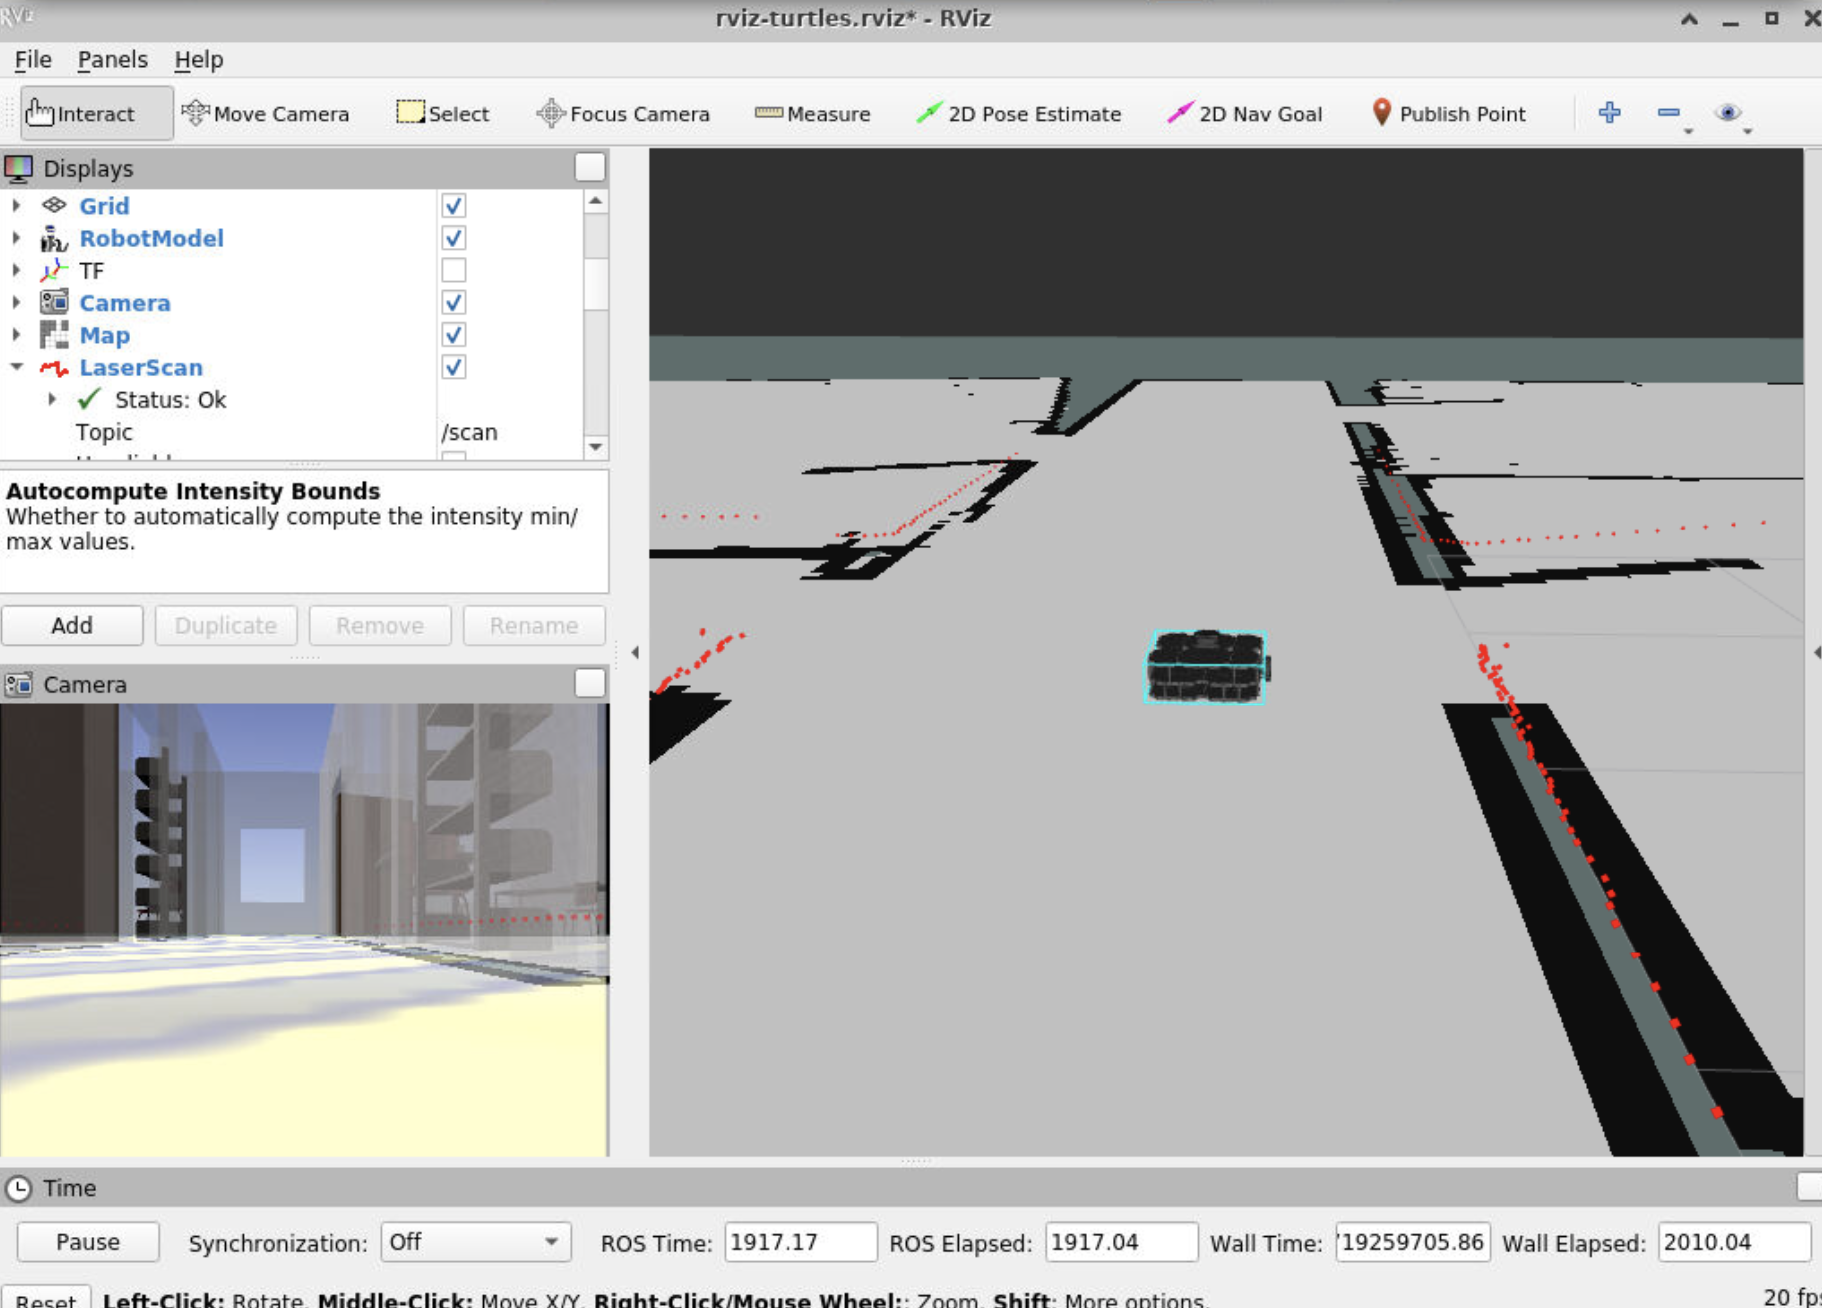

## Start turtlebot Simulation

> Note: **Open the `Desktop` tab first**

Run the launchfiles to start Gazebo, navigation and the TF buffer.

In [ ]:
import psutil
import subprocess
import rospy

rospy.init_node('assignment6')

# simulation shell commands
commands = [
    'roslaunch turtlebot3_gazebo turtlebot3_iai.launch gui:=false',
    'roslaunch turtlebot3_gazebo turtlebot3_navigation.launch',
    'rosrun tf2_ros buffer_server'
]

# Run commands in the background processes
sim_process = [
    psutil.Popen(['/bin/bash', '-c', cmd], stdout=subprocess.DEVNULL,stderr=subprocess.DEVNULL)
    for cmd in commands
]

sim_process

## Task 1 - Remote control

Write or re-use a listener to your up, down, right, left and 0 keys. 0 will stop the current movement by publishing zeroes. Publish to `/cmd_vel` how you desire the robot to move.

In [ ]:
from geometry_msgs.msg import Twist, Vector3

cmd_vel_pub = rospy.Publisher('/cmd_vel', Twist, queue_size=10)
cmd_vel_msg = Twist()

In [ ]:
cmd_vel_msg.linear.x = 0.1
cmd_vel_pub.publish(cmd_vel_msg)

In [ ]:
cmd_vel_msg.linear.x = 0
cmd_vel_pub.publish(cmd_vel_msg)

## Task 2 - Stop!

Using the listener to the `/scan` topic, write a publisher to `/cmd_vel` that stops driving forward, when it expects a collision in front of it.

In [ ]:
from sensor_msgs.msg import LaserScan

def scan_callback(msg):
    # calculate min distance
    min_distance = min([r for r in msg.ranges if msg.range_min < r < msg.range_max])
    stop_distance = 0.5
    if min_distance < stop_distance:
        print(f'Stop!!! Obstacle detected {min_distance} meters ahead!')
        cmd_vel_msg.linear.x = 0
        cmd_vel_pub.publish(cmd_vel_msg)
        subscriber.unregister()

subscriber = rospy.Subscriber("/scan", LaserScan, scan_callback)

In [ ]:
subscriber.unregister() 

## Task 3 - Follow the wall

Write the behavior of following the right wall. The robot should follow the wall around corners and go through doors. Additionally the robot should follow the wall at a fixed distance.